In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import pandas as pd
import os
import cv2

## Part 1: Data Preprocessing

### Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 設定資料路徑
# training data path
trcloudy='/content/drive/MyDrive/weather_iamge/train/cloudy/'
trrain='/content/drive/MyDrive/weather_iamge/train/rain/'
trshine='/content/drive/MyDrive/weather_iamge/train/shine/'
trsunrise='/content/drive/MyDrive/weather_iamge/train/sunrise/'
# testing data path
testpath='/content/drive/MyDrive/weather_iamge/test/'

In [4]:
# 顯示資料筆數
print('train cloudy length: ',len(os.listdir(trcloudy)))
print('train rain length: ',len(os.listdir(trrain)))
print('train shine length: ',len(os.listdir(trshine)))
print('train sunrise length: ',len(os.listdir(trsunrise)))
print('\n')
print('test data length: ',len(os.listdir(testpath)))

train cloudy length:  280
train rain length:  199
train shine length:  232
train sunrise length:  337


test data length:  75


### convert image data to numpy

In [5]:
# convert the train data to numpy
tr_label=list()
tr_data=np.empty(shape=(1048,300,300,3))
psite=0
for i in range(len(os.listdir(trcloudy))):
  f=os.listdir(trcloudy)[i]
  img=cv2.imread(trcloudy+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[psite]=img
  tr_label.append(0)
  psite+=1
for i in range(len(os.listdir(trrain))):
  f=os.listdir(trrain)[i]
  img=cv2.imread(trrain+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[psite]=img
  tr_label.append(1)
  psite+=1
for i in range(len(os.listdir(trshine))):
  f=os.listdir(trshine)[i]
  img=cv2.imread(trshine+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[psite]=img
  tr_label.append(2)
  psite+=1
for i in range(len(os.listdir(trsunrise))):
  f=os.listdir(trsunrise)[i]
  img=cv2.imread(trsunrise+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  tr_data[psite]=img
  tr_label.append(3)
  psite+=1

tr_label=np.array(tr_label)

In [6]:
# convert the test data to numpy
te_filename=list()
te_data=np.empty(shape=(75,300,300,3))
for i in range(len(os.listdir(testpath))):
  f=os.listdir(testpath)[i]
  te_filename.append(f)
  img=cv2.imread(testpath+f)
  img=cv2.resize(img,(300,300))
  img=img[:,:,::-1]/255
  te_data[i]=img

In [7]:
# show data size
print('train data size:',tr_data.shape)
print('train label size:',len(tr_label))
print('test data size:',te_data.shape)

train data size: (1048, 300, 300, 3)
train label size: 1048
test data size: (75, 300, 300, 3)


### shuffle

In [8]:
# on-hot label
from tensorflow.keras.utils import to_categorical
tr_label=to_categorical(tr_label)
# 打亂資料順序
from sklearn.utils import shuffle
tr_data,tr_label=shuffle(tr_data,tr_label,random_state=0)

### train_validation data split

In [9]:
# train_validation data split
#val_data數量固定262個
train_data=tr_data[0:786]
val_data=tr_data[786:]
train_label=tr_label[0:786]
val_label=tr_label[786:]
print('train data size: ',train_data.shape)
print('validation data size: ',val_data.shape)
print('train label size: ',train_label.shape)
print('validation label size: ',val_label.shape)

train data size:  (786, 300, 300, 3)
validation data size:  (262, 300, 300, 3)
train label size:  (786, 4)
validation label size:  (262, 4)


## Part 2: Build a simple CNN

In [10]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import adam_v2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout

cnn = Sequential()
cnn.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(300,300,3),padding='same',activation='relu'))
cnn.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu'))
cnn.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
#cnn.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
#cnn.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
#cnn.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(4096,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(4096,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1000,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(4,activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     49280     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                    

In [11]:
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
optimizer = adam_v2.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
cnn.compile(optimizer=optimizer,loss = 'categorical_crossentropy',metrics=['accuracy'])

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor = 'val_accuracy', restore_best_weights=True)]
history = cnn.fit_generator(img_gen.flow(train_data*255, train_label, batch_size = 16),
                                      steps_per_epoch = len(train_data)/16, validation_data = (val_data,val_label), epochs = 35 ,callbacks = my_callbacks)

Epoch 1/35
49/49 [==============================] - 85s 1s/step - loss: 1.3786 - accuracy: 0.3639 - val_loss: 1.3428 - val_accuracy: 0.4008
Epoch 2/35
49/49 [==============================] - 54s 1s/step - loss: 1.0608 - accuracy: 0.5076 - val_loss: 0.7892 - val_accuracy: 0.5382
Epoch 3/35
49/49 [==============================] - 54s 1s/step - loss: 0.8533 - accuracy: 0.5738 - val_loss: 0.7393 - val_accuracy: 0.5802
Epoch 4/35
49/49 [==============================] - 54s 1s/step - loss: 0.7754 - accuracy: 0.6234 - val_loss: 0.6409 - val_accuracy: 0.7290
Epoch 5/35
49/49 [==============================] - 54s 1s/step - loss: 0.6737 - accuracy: 0.6997 - val_loss: 0.5949 - val_accuracy: 0.7786
Epoch 6/35
49/49 [==============================] - 54s 1s/step - loss: 0.6087 - accuracy: 0.7468 - val_loss: 0.5436 - val_accuracy: 0.8092
Epoch 7/35
49/49 [==============================] - 54s 1s/step - loss: 0.6144 - accuracy: 0.7366 - val_loss: 0.5451 - val_accuracy: 0.8130
Epoch 8/35
49/49 [==

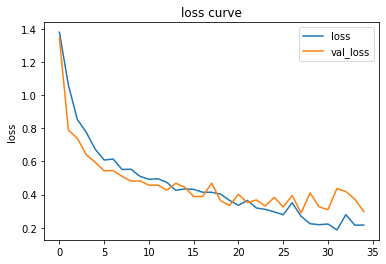

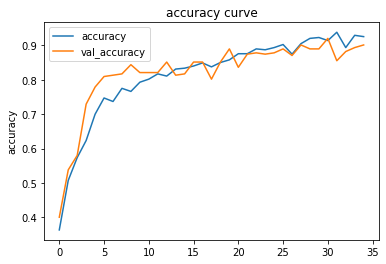

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Plot the confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
pre=cnn.predict(val_data)
pre=np.argmax(pre,axis=1)

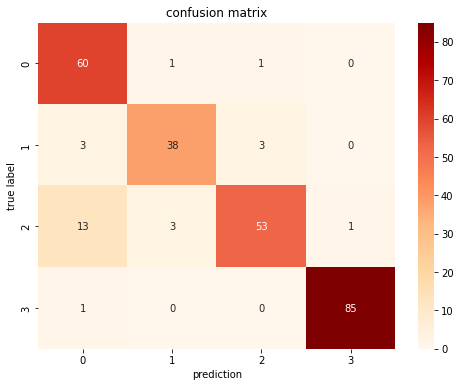

In [14]:
import seaborn as sn
cm=confusion_matrix(pre,np.argmax(val_label,axis=1))
fit=plt.figure(figsize=(8,6))
plt.title('confusion matrix')
sn.heatmap(cm,annot=True,cmap='OrRd',fmt='g')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()

# Output the csv file

In [15]:
import pandas as pd

In [16]:
prediction=cnn.predict(te_data)
prediction=np.argmax(prediction,axis=1)
prediction

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 0, 3, 3, 2, 0, 2, 3,
       2, 2, 0, 2, 0, 2, 0, 3, 2])

In [17]:
test_label=pd.DataFrame()
test_label['image_id']=te_filename
test_label['labels']=prediction
test_label=test_label.sort_values(by='image_id')
test_label.to_csv('/content/drive/MyDrive/weather_iamge/E94074029_kaggle.csv',index=False) #結果轉csv檔

# Part3: Data augmentation

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

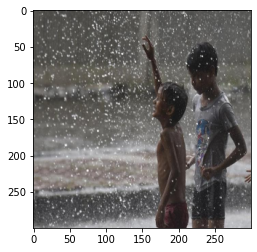

In [19]:
data=tr_data[1]
data=data_augmentation(data)
plt.imshow(data)